In [20]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
list = []
list.append([1,2])
list.append([2,3])
print(list)

[[1, 2], [2, 3]]


In [49]:



# then locating growth candidates aroundthe cluster, and 

#assigning a growth probability pg for each growth candidate, as a function of the concentration of diffusing nutrients at that growth location. Next,
#a single growth candidate is added to the cluster with probability pg .
#After thisgrowth step, the diffusion equation is again solved, and the process is iterated for
#a large number of growth steps.

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
 [ 9.  9.  9.  9.  9.  9.  9.  9.  9.  9.]
 [ 8.  8.  8.  8.  8.  8.  8.  8.  8.  8.]
 [ 7.  7.  7.  7.  7.  7.  7.  7.  7.  7.]
 [ 6.  6.  6.  6.  6.  6.  6.  6.  6.  6.]
 [ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
 [ 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 

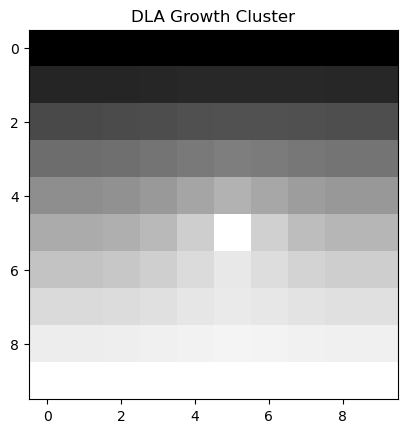

In [83]:
# initalise concentration field with linear field 
N = 10
y = np.linspace(N,1,N)
max_growth = 500
eta = 1
max_iter = 10000

def SOR_object(c_last,N, grid , w, epsilon):
    c_current = c_last.copy()
    c_next = np.zeros((N, N))

    c_current[-1, :] = 0
    c_current[0, :] = 1 
    iteration = 0
    while iteration < max_iter:
        c_next = c_current.copy()  

        for i in range(0, N):
            for j in range(0, N):
                if grid[i, j] == 1: 
                    print(i,j)
                    c_next[i, j] = 0
                elif 0 < i < N-1 and 0 < j < N-1: 
                    c_next[i, j] = (w / 4) * (c_current[i+1, j] + c_next[i-1, j] +
                                              c_current[i, j+1] + c_next[i, j-1]) + (1-w) * c_current[i, j]
        #c_next[-1, :] = 0
        c_next[0, :] = 1
        c_next[:, 0] = c_next[:, 1]
        c_next[:, -1] = c_next[:, -2]

        delta = np.max(np.abs(c_next - c_current))
        if delta < epsilon:
            return c_current, iteration

        c_current[:, :] = c_next[:, :]
        iteration += 1
    return c_current, iteration

def find_candidates():
    candidates = []
    for i in range(N):
        for j in range(N):
            if grid[i, j] == 1: 
                if i + 1 < N and grid[i + 1, j] == 0 and (i + 1, j) not in candidates:
                    candidates.append((i + 1, j))
                if i - 1 >= 0 and grid[i - 1, j] == 0 and (i - 1, j) not in candidates:
                    candidates.append((i - 1, j))
                if j + 1 < N and grid[i, j + 1] == 0 and (i, j + 1) not in candidates:
                    candidates.append((i, j + 1))
                if j - 1 >= 0 and grid[i, j - 1] == 0 and (i, j - 1) not in candidates:
                    candidates.append((i, j - 1))
    return candidates

def DLA():
    candidates = find_candidates()
    probabilities = np.array([c_current[i, j] for i, j in candidates])
    probabilities /= probabilities.sum() 

    chosen_index = np.random.choice(len(candidates), p=probabilities)
    chosen_point = candidates.pop(chosen_index) 
    grid[chosen_point] = 1  
    candidates = find_candidates()
    return grid, candidates

# one sinkpoint
grid_start  = np.zeros((N,N))
grid_start[5,5]= 1
print(grid_start)
# initial c with one sink point
c_current = np.zeros((N,N))
c_current[:,] = y.reshape(N, 1)
print(c_current)

c_new, iteration = SOR_object(c_current, N, grid_start, w=1.95, epsilon=1e-5)
print(c_new)

plt.imshow(c_new, cmap="gray_r")
plt.title("DLA Growth Cluster")
plt.show()